In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
import pandas as pd
import matplotlib.ticker as ticker

home_dir = "/home/harka424/Documents/COSC490/Stemming"
data_dir = path.join(home_dir, "Data/wikt")
labels = ["Paice/Husk", "Krovetz", "S-Stripping", "Porter2", "Lovins","Wiktionary"]

In [23]:
SMALL_SIZE = 11
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# sns.set_palette(sns.color_palette())
# sns.set_style()

### Edit Distance

In [3]:
paiceHusk_word_distances = np.loadtxt(path.join(data_dir, "paiceHusk_word_distances.csv"))
krovetz_word_distances = np.loadtxt(path.join(data_dir, "krovetz_word_distances.csv"))
sStripping_word_distances = np.loadtxt(path.join(data_dir, "sStripping_word_distances.csv"))
porter2_word_distances = np.loadtxt(path.join(data_dir, "porter2_word_distances.csv"))
lovins_word_distances = np.loadtxt(path.join(data_dir, "lovins_word_distances.csv"))

In [4]:
data = {
    "Paice/Husk" : paiceHusk_word_distances
}
paiceHusk = pd.DataFrame(data=data)
paiceHusk = paiceHusk.reset_index().melt(id_vars=["index"])
paiceHusk = paiceHusk.rename(columns={"variable":"Stemmer"})

data = {
    "Krovetz" : krovetz_word_distances
}
krovetz = pd.DataFrame(data=data)
krovetz = krovetz.reset_index().melt(id_vars=["index"])
krovetz = krovetz.rename(columns={"variable":"Stemmer"})

data={
    "S-Stripping" : sStripping_word_distances
}
sStripping = pd.DataFrame(data=data)
sStripping = sStripping.reset_index().melt(id_vars=["index"])
sStripping = sStripping.rename(columns={"variable":"Stemmer"})

data={
    "Porter2" : porter2_word_distances
}
porter2 = pd.DataFrame(data=data)
porter2 = porter2.reset_index().melt(id_vars=["index"])
porter2 = porter2.rename(columns={"variable":"Stemmer"})

data={
    "Lovins" : lovins_word_distances
}
lovins = pd.DataFrame(data=data)
lovins = lovins.reset_index().melt(id_vars=["index"])
lovins = lovins.rename(columns={"variable":"Stemmer"})


word_distances = pd.concat([paiceHusk,krovetz,sStripping,porter2,lovins])
display(word_distances)

,index,Stemmer,value
0,0,Paice/Husk,0.0
1,1,Paice/Husk,0.0
2,2,Paice/Husk,0.0
3,3,Paice/Husk,1.0
4,4,Paice/Husk,0.0
...,...,...,...
362889,362889,Lovins,0.0
362890,362890,Lovins,0.0
362891,362891,Lovins,1.0
362892,362892,Lovins,0.0


In [5]:
for stemmer in labels[:-1]:
    target_data = word_distances[word_distances["Stemmer"] == stemmer]
    print(f"{stemmer} {target_data['value'].mean()}")

Paice/Husk 1.6832215467877671
Krovetz 1.1657922148065276
S-Stripping 1.9660810043704222
Porter2 1.4187641570265697
Lovins 1.4290040617921487


In [6]:
summary = list()
for stemmer in labels[:-1]:
    target_data = word_distances[word_distances["Stemmer"] == stemmer]
    entry = {}
    entry["Stemmer"] = stemmer
    entry["Mean"] = str(target_data['value'].mean())[:4]
    summary.append(entry)
summary = pd.DataFrame(summary)
display(summary)

,Stemmer,Mean
0,Paice/Husk,1.68
1,Krovetz,1.16
2,S-Stripping,1.96
3,Porter2,1.41
4,Lovins,1.42


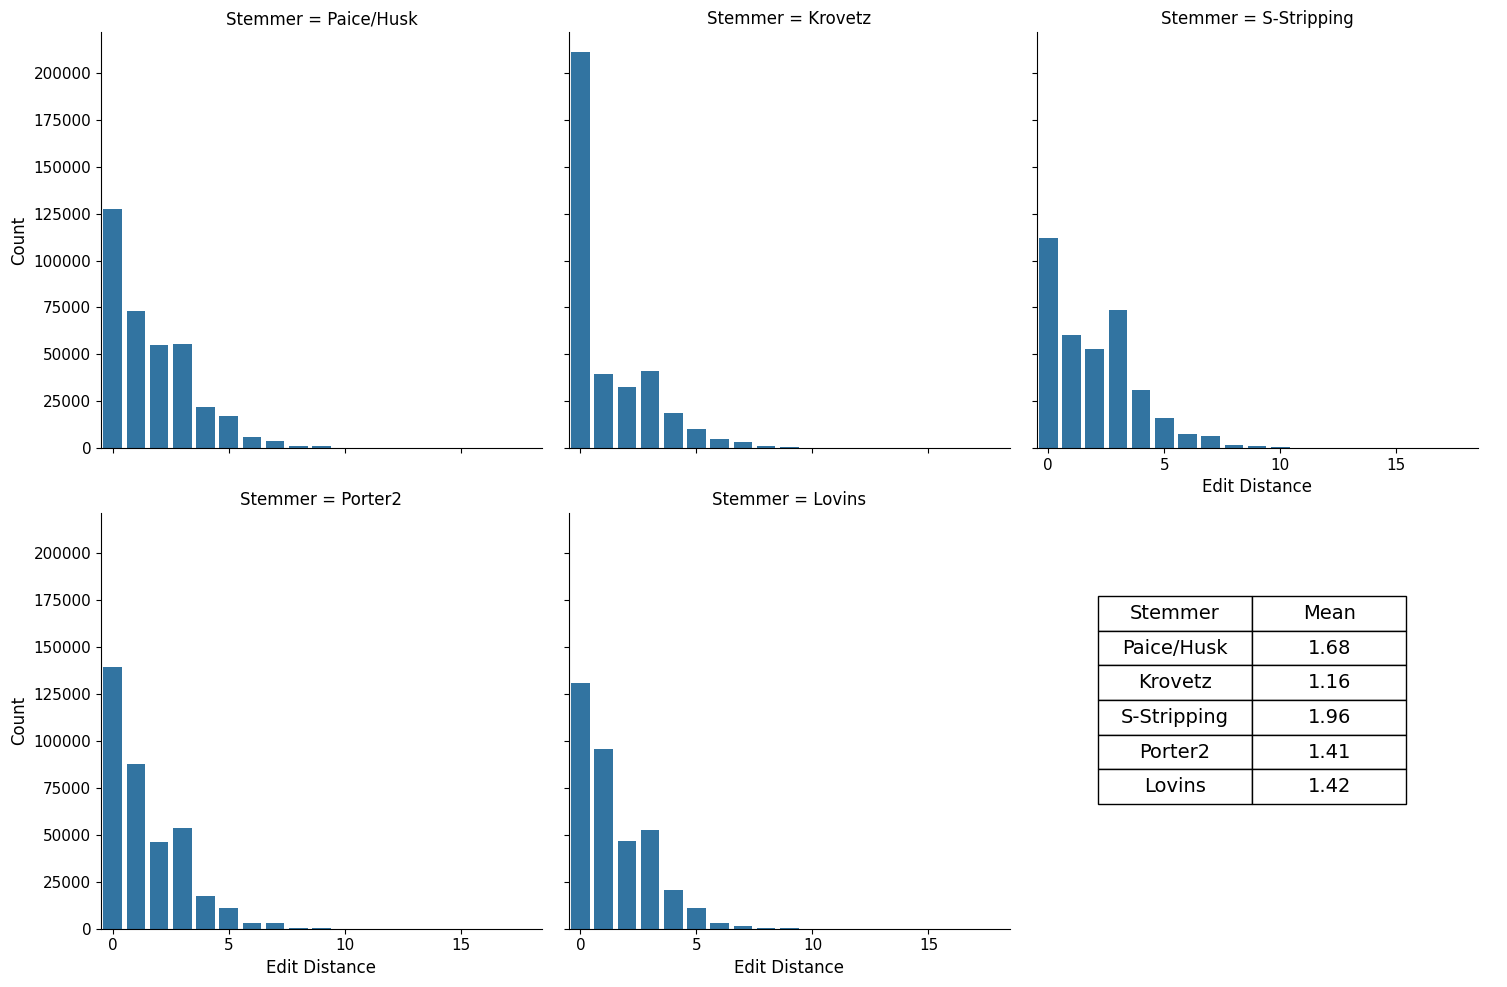

In [24]:
axes = sns.catplot(data=word_distances, kind="count", x="value", col="Stemmer", col_wrap=3)
for ax in axes.axes:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
axes.set(ylabel="Count",xlabel="Edit Distance")
plt.table(cellText=summary.values, colLabels=summary.columns, cellLoc= 'center', rowLoc='center', loc='right', bbox=[1.2,.3,0.7,0.5]).set_fontsize(14)
plt.show()

### Total Clusters

In [8]:
wikt_distribution = np.loadtxt(path.join(data_dir, "wikt_distribution.csv"))
paiceHusk_distribution = np.loadtxt(path.join(data_dir, "paiceHusk_distribution.csv"))
krovetz_distribution = np.loadtxt(path.join(data_dir, "krovetz_distribution.csv"))
sStripping_distribution = np.loadtxt(path.join(data_dir, "sStripping_distribution.csv"))
porter2_distribution = np.loadtxt(path.join(data_dir, "porter2_distribution.csv"))
lovins_distribution = np.loadtxt(path.join(data_dir, "lovins_distribution.csv"))

In [9]:
data = {
    "Wiktionary": wikt_distribution
}
wikt = pd.DataFrame(data=data)
wikt = wikt.reset_index().melt(id_vars=["index"])
wikt = wikt.rename(columns={"variable":"Stemmer"})

data = {
    "Paice/Husk" : paiceHusk_distribution
}
paiceHusk = pd.DataFrame(data=data)
paiceHusk = paiceHusk.reset_index().melt(id_vars=["index"])
paiceHusk = paiceHusk.rename(columns={"variable":"Stemmer"})

data = {
    "Krovetz" : krovetz_distribution
}
krovetz = pd.DataFrame(data=data)
krovetz = krovetz.reset_index().melt(id_vars=["index"])
krovetz = krovetz.rename(columns={"variable":"Stemmer"})

data={
    "S-Stripping" : sStripping_distribution
}
sStripping = pd.DataFrame(data=data)
sStripping = sStripping.reset_index().melt(id_vars=["index"])
sStripping = sStripping.rename(columns={"variable":"Stemmer"})

data={
    "Porter2" : porter2_distribution
}
porter2 = pd.DataFrame(data=data)
porter2 = porter2.reset_index().melt(id_vars=["index"])
porter2 = porter2.rename(columns={"variable":"Stemmer"})

data={
    "Lovins" : lovins_distribution
}
lovins = pd.DataFrame(data=data)
lovins = lovins.reset_index().melt(id_vars=["index"])
lovins = lovins.rename(columns={"variable":"Stemmer"})


cluster_sizes = pd.concat([wikt,paiceHusk,krovetz,sStripping,porter2,lovins])
display(cluster_sizes)

,index,Stemmer,value
0,0,Wiktionary,1.0
1,1,Wiktionary,1.0
2,2,Wiktionary,1.0
3,3,Wiktionary,1.0
4,4,Wiktionary,1.0
...,...,...,...
207843,207843,Lovins,1.0
207844,207844,Lovins,1.0
207845,207845,Lovins,1.0
207846,207846,Lovins,1.0


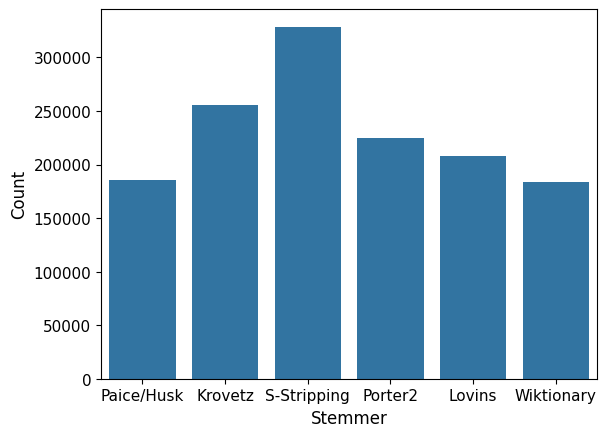

In [25]:
data = [len(paiceHusk_distribution),len(krovetz_distribution),len(sStripping_distribution),len(porter2_distribution),len(lovins_distribution),len(wikt_distribution)]
sns.barplot(x=labels, y=data)
plt.xlabel("Stemmer")
plt.ylabel("Count")
plt.show()

### Cluster Size Distribution

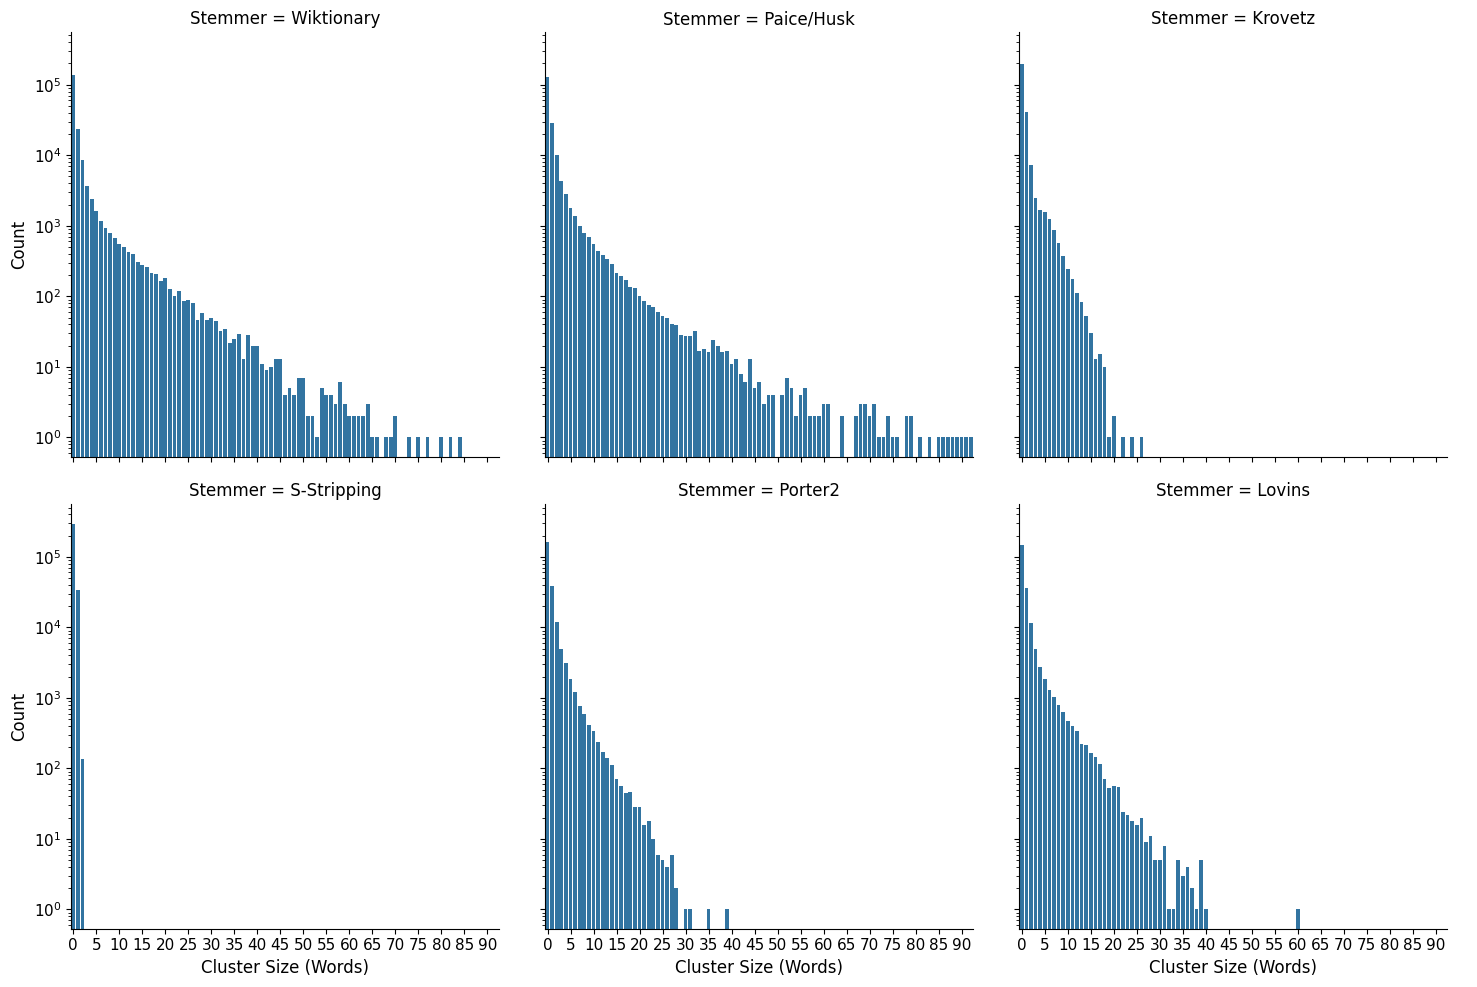

In [27]:
axes = sns.catplot(data=cluster_sizes, kind="count", x="value", col="Stemmer", col_wrap=3)
for ax in axes.axes:
    ax.set_yscale("log")
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
axes.set(ylabel="Count",xlabel="Cluster Size (Words)")
plt.show()

### F-measure Distribution

In [43]:
paiceHusk_cluster_fmeasures = np.loadtxt(path.join(data_dir, "paiceHusk_cluster_fmeasures.csv"))
krovetz_cluster_fmeasures = np.loadtxt(path.join(data_dir, "krovetz_cluster_fmeasures.csv"))
sStripping_cluster_fmeasures = np.loadtxt(path.join(data_dir, "sStripping_cluster_fmeasures.csv"))
porter2_cluster_fmeasures = np.loadtxt(path.join(data_dir, "porter2_cluster_fmeasures.csv"))
lovins_cluster_fmeasures = np.loadtxt(path.join(data_dir, "lovins_cluster_fmeasures.csv"))

fmeasures = [paiceHusk_cluster_fmeasures, krovetz_cluster_fmeasures, sStripping_cluster_fmeasures, porter2_cluster_fmeasures, lovins_cluster_fmeasures]

In [44]:
averages = list()
for stemmer in fmeasures:
    averages.append(stemmer.mean())

data = {
    "Stemmer" : labels[:-1],
    "F-measure" : averages
}

average_fmeasures = pd.DataFrame(data=data)
display(average_fmeasures)

,Stemmer,F-measure
0,Paice/Husk,0.811475
1,Krovetz,0.747436
2,S-Stripping,0.619239
3,Porter2,0.772651
4,Lovins,0.778938


In [45]:
data = {
    "Paice/Husk" : paiceHusk_cluster_fmeasures
}
paiceHusk = pd.DataFrame(data=data)
paiceHusk = paiceHusk.reset_index().melt(id_vars=["index"])
paiceHusk = paiceHusk.rename(columns={"variable":"Stemmer"})

data = {
    "Krovetz" : krovetz_cluster_fmeasures
}
krovetz = pd.DataFrame(data=data)
krovetz = krovetz.reset_index().melt(id_vars=["index"])
krovetz = krovetz.rename(columns={"variable":"Stemmer"})

data={
    "S-Stripping" : sStripping_cluster_fmeasures
}
sStripping = pd.DataFrame(data=data)
sStripping = sStripping.reset_index().melt(id_vars=["index"])
sStripping = sStripping.rename(columns={"variable":"Stemmer"})

data={
    "Porter2" : porter2_cluster_fmeasures
}
porter2 = pd.DataFrame(data=data)
porter2 = porter2.reset_index().melt(id_vars=["index"])
porter2 = porter2.rename(columns={"variable":"Stemmer"})

data={
    "Lovins" : lovins_cluster_fmeasures
}
lovins = pd.DataFrame(data=data)
lovins = lovins.reset_index().melt(id_vars=["index"])
lovins = lovins.rename(columns={"variable":"Stemmer"})

In [46]:
fmeasures = pd.concat([paiceHusk,krovetz,sStripping,porter2,lovins])
display(fmeasures)

,index,Stemmer,value
0,0,Paice/Husk,1.0
1,1,Paice/Husk,1.0
2,2,Paice/Husk,1.0
3,3,Paice/Husk,1.0
4,4,Paice/Husk,1.0
...,...,...,...
207843,207843,Lovins,1.0
207844,207844,Lovins,1.0
207845,207845,Lovins,1.0
207846,207846,Lovins,1.0


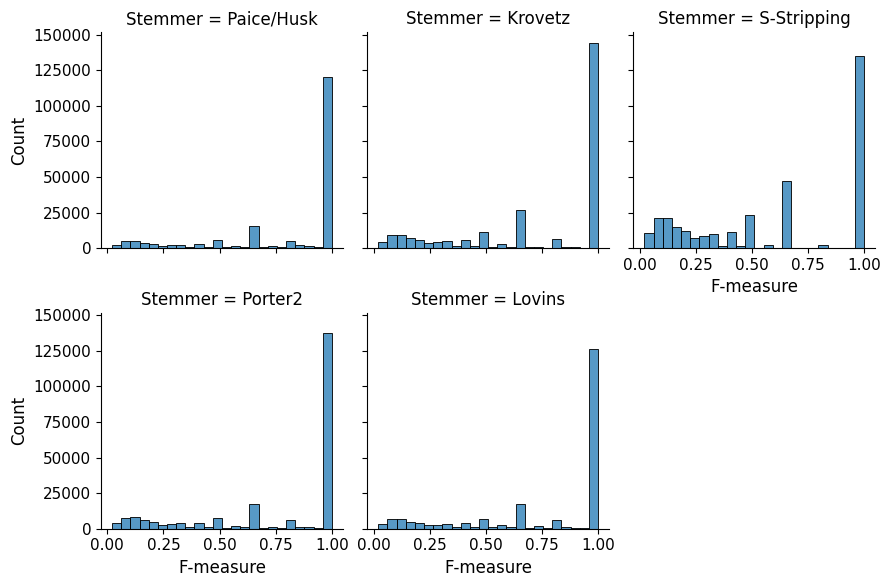

In [32]:
g = sns.FacetGrid(fmeasures, col="Stemmer", col_wrap=3)
g.map_dataframe(sns.histplot, x="value", binwidth=0.04)
g.set(xlabel="F-measure")

### Average F-measure

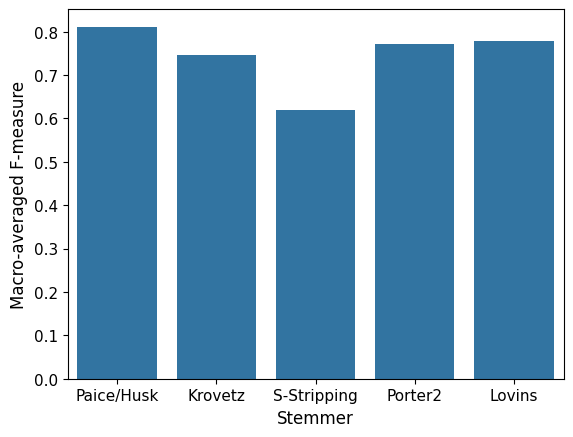

In [48]:
sns.barplot(x="Stemmer", y="F-measure", data=average_fmeasures)
plt.ylabel("Macro-averaged F-measure")
plt.show()